In [60]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets",'housing')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1113ef240>,
      dtype=object)

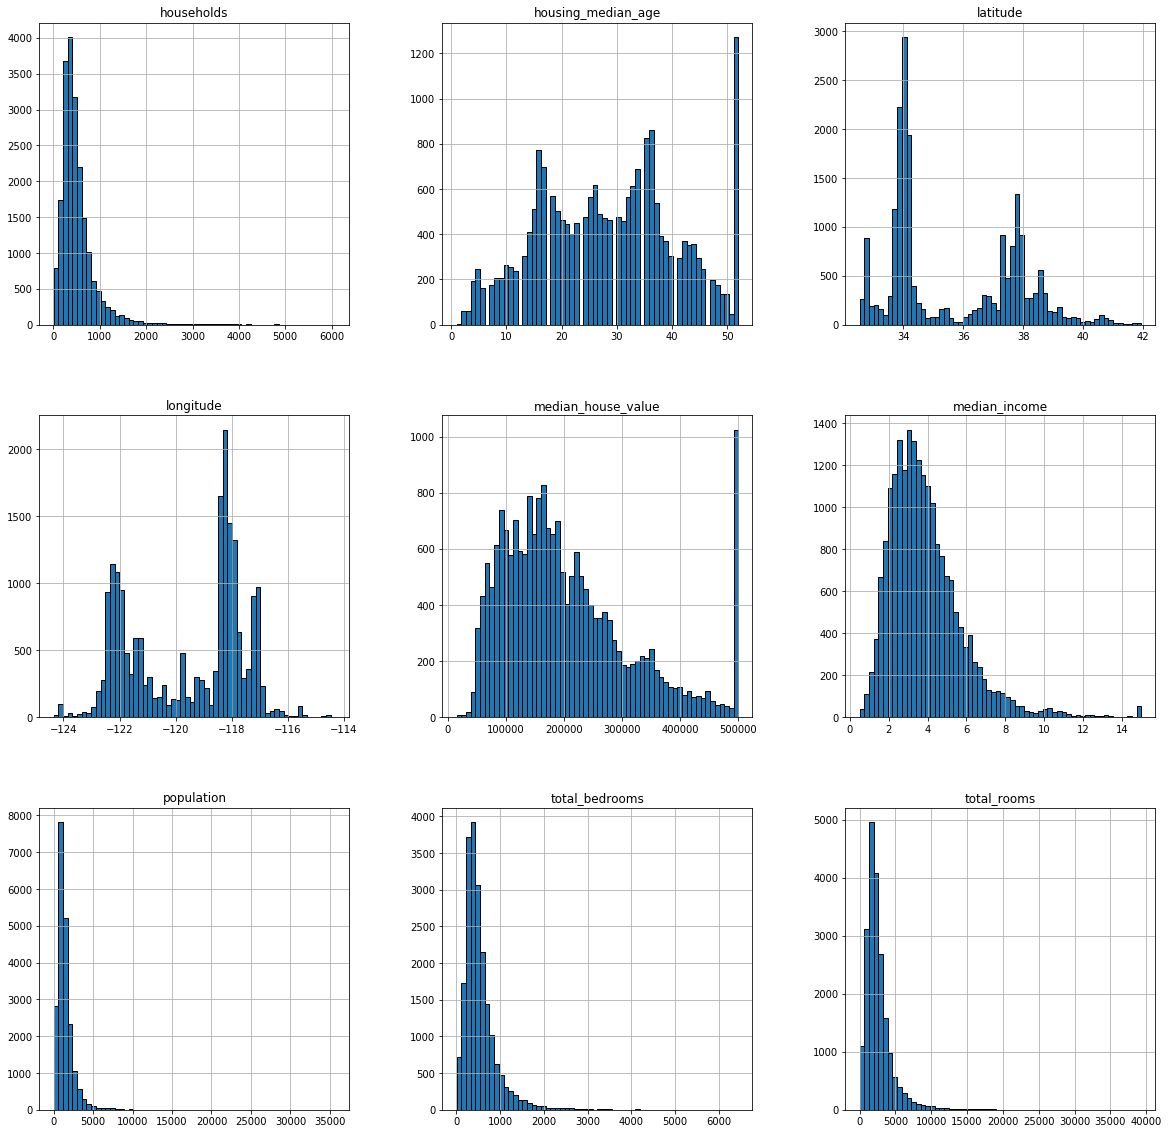

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=60, figsize=(20,20), ec='black')

In [12]:
import numpy as np

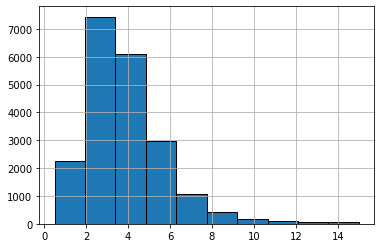

In [15]:
housing['median_income'].hist(ec='black')

In [16]:
housing['income_category'] = pd.cut(housing['median_income'], 
                                    bins=[0.,1.5,3.,4.5,6.,np.inf],
                                    labels=[1,2,3,4,5])

In [17]:
housing['income_category'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_category, dtype: int64

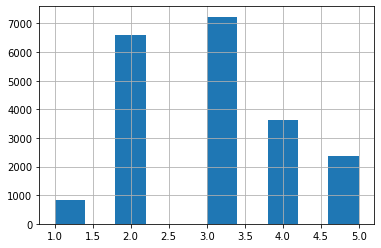

In [18]:
housing['income_category'].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)
for train_index, test_index in split.split(housing,housing['income_category']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
def split_error(data):
    return data['income_category'].value_counts() / len(data)

comparison = pd.DataFrame({'Overall': split_error(housing),
                           'Stratified': split_error(strat_test_set)}).sort_index()
comparison

,Overall,Stratified
1,0.039826,0.039729
2,0.318847,0.318798
3,0.350581,0.350533
4,0.176308,0.176357
5,0.114438,0.114583


In [22]:
comparison['Strat. %error'] = abs(100*(comparison['Stratified'] - comparison['Overall'])/comparison['Overall'])
comparison

,Overall,Stratified,Strat. %error
1,0.039826,0.039729,0.243309
2,0.318847,0.318798,0.015195
3,0.350581,0.350533,0.013820
4,0.176308,0.176357,0.027480
5,0.114438,0.114583,0.127011


In [ ]:
train_copy = strat_train_set.copy()

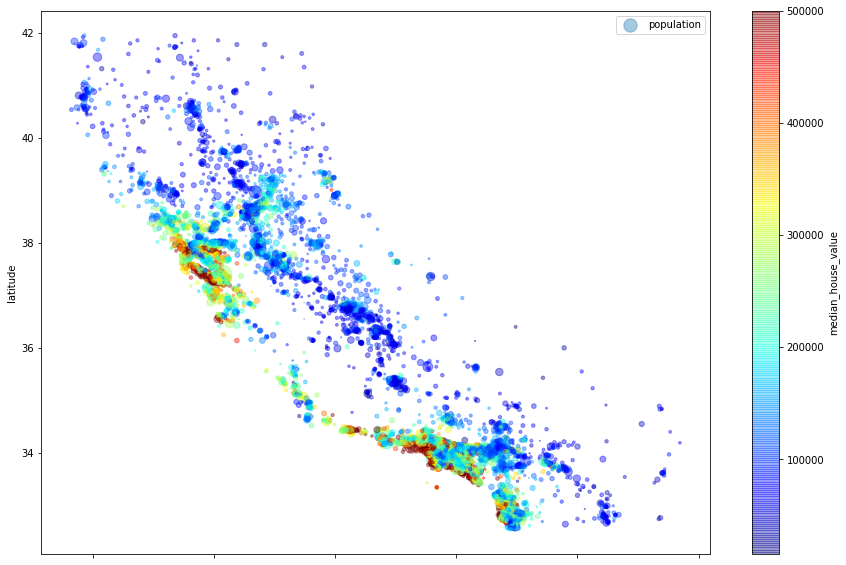

In [23]:
train_copy.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
                     s=housing['population']/100, label='population',figsize=(15,10),
                     c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [24]:
corr_matrix = train_copy.corr()

In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686885
total_rooms           0.138058
housing_median_age    0.105304
households            0.070064
total_bedrooms        0.052868
population           -0.021503
longitude            -0.051170
latitude             -0.137682
Name: median_house_value, dtype: float64

In [26]:
import seaborn as sns

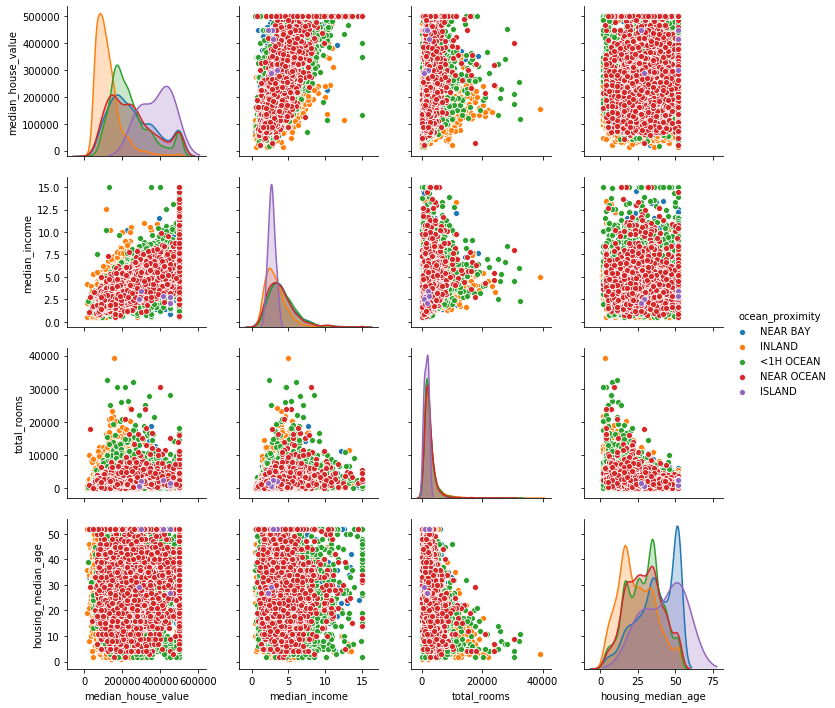

In [32]:
attributes = ['median_house_value', 'median_income', 'total_rooms',
              'housing_median_age','ocean_proximity']
sns.pairplot(train_copy[attributes],hue='ocean_proximity')

In [36]:
train_copy['rooms_per_household']=train_copy['total_rooms']/train_copy['households']
train_copy['bedrooms_per_room']=train_copy['total_bedrooms']/train_copy['total_rooms']
train_copy['populatiion_per_household']=train_copy['population']/train_copy['households']

In [37]:
corr_matrix = train_copy.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.686885
rooms_per_household          0.159500
total_rooms                  0.138058
housing_median_age           0.105304
households                   0.070064
total_bedrooms               0.052868
population                  -0.021503
populatiion_per_household   -0.027110
longitude                   -0.051170
latitude                    -0.137682
bedrooms_per_room           -0.255168
Name: median_house_value, dtype: float64

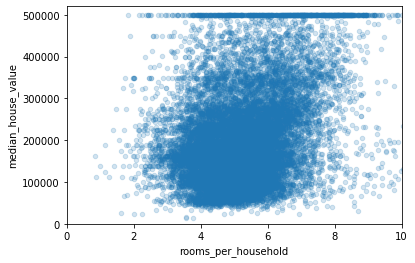

In [40]:
train_copy.plot(kind='scatter',x="rooms_per_household", y="median_house_value",alpha=0.2)
plt.axis([0, 10, 0, 520000])
plt.show()

In [ ]:
housing_num = housing.drop('ocean_proximity', axis=1)
housing_cat = housing[['ocean_proximity']]

In [41]:
from sklearn.preprocessing import Imputer as SimpleImputer
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer,StandardScaler

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})


In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

In [ ]:
housing_prepared.shape

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [43]:
imputer = SimpleImputer(strategy='median')
housing_num = strat_train_set.drop('ocean_proximity',axis=1)

In [44]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [45]:
imputer.statistics_

array([-1.18480000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
        4.36000000e+02,  1.16800000e+03,  4.11000000e+02,  3.53380000e+00,
        1.79200000e+05,  3.00000000e+00,  5.22476008e+00,  2.03427090e-01,
        2.82065903e+00])

In [46]:
housing_num.median().values

array([-1.18480000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
        4.36000000e+02,  1.16800000e+03,  4.11000000e+02,  3.53380000e+00,
        1.79200000e+05,  3.00000000e+00,  5.22476008e+00,  2.03427090e-01,
        2.82065903e+00])

In [47]:
X = imputer.transform(housing_num)

In [51]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)

In [52]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_category,rooms_per_household,bedrooms_per_room,populatiion_per_household
16177,-122.38,37.71,47.0,1088.0,190.0,558.0,166.0,4.2708,207100.0,3.0,6.554217,0.174632,3.361446
13074,-121.28,38.59,3.0,4188.0,1136.0,2081.0,995.0,3.0481,92500.0,3.0,4.209045,0.271251,2.091457
4375,-118.28,34.10,48.0,805.0,246.0,633.0,235.0,2.3421,200000.0,2.0,3.425532,0.305590,2.693617
3931,-118.59,34.21,26.0,2335.0,669.0,1986.0,645.0,2.9974,178800.0,2.0,3.620155,0.286510,3.079070
19528,-120.97,37.64,42.0,2359.0,504.0,1131.0,480.0,2.0833,95500.0,2.0,4.914583,0.213650,2.356250


In [54]:
housing_cat = strat_train_set[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
16177,NEAR BAY
13074,INLAND
4375,<1H OCEAN
3931,<1H OCEAN
19528,INLAND


In [57]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_hot = encoder.fit_transform(housing_cat)
housing_cat_hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [58]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [59]:
# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]


In [ ]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)